#### OM NAMO NARAYANA

**Reference implementation** : https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/ 

In [1]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd
import random
import numpy as np
import math
from tqdm import tqdm

## Dataset preparation

We use NLTK for word tokenizers

#### Desired format

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# dataset_dir = '/content/drive/My Drive/thirukkural_meanings.json'
base_dir = 'H:/sem8/nlp/Context-Comprehension-Enhancement-Tamil/'
dataset_dir = base_dir + 'T_Dataset/thirukkural_meanings.json'

In [5]:
# dataset_dir = 'H:/sem8/nlp/proof-of-concept/Motivational Quotes Database.csv'


# df = pd.read_csv(dataset_dir)
# df.head()



df = pd.DataFrame([
 {
    'text': 'If one is easy of access to all, it will be easy for one to obtain the virtue called goodness',
    'id': 991
},
  {
    'text': 'Affectionateness and birth in a good family, these two constitute what is called a proper behaviour to all',
    'id': 992
},
  {
    'text': 'Resemblance of bodies is no resemblance of souls; true resemblance is the resemblance of qualities that attract',
    'id': 993
},
 ])

df.head()

,text,id
0,"If one is easy of access to all, it will be ea...",991
1,"Affectionateness and birth in a good family, t...",992
2,Resemblance of bodies is no resemblance of sou...,993


In [6]:
df = pd.read_json(dataset_dir)
df=df.T
df["text"]=df["explanation"]
del df["explanation"]
df=df.sort_index()
df.head(1330)

,id,text
1,1,As all letters have the letter A for their fi...
2,2,"What Profit have those derived from learning,..."
3,3,They who are united to the glorious feet of H...
4,4,To those who meditate the feet of Him who is ...
5,5,The two-fold deeds that spring from darkness ...
...,...,...
1326,1326,To digest what has been eaten is more delight...
1327,1327,Those are conquerors whose dislike has been d...
1328,1328,"Will I enjoy once more through her dislike, t..."
1329,1329,"May the bright-jewelled one feign dislike, an..."


In [7]:
sentences = df['text'].to_list()
sentences[:2]

[' As all letters have the letter A for their first, so the world has the eternalGod for its first. ',
 ' What Profit have those derived from learning, who worship not the good feet of Him who is possessed of pure knowledge ?. ']

In [8]:
tokenized_sent = []
for s in tqdm(sentences):
    tokenized_sent.append(word_tokenize(s.lower()))
print(*tokenized_sent[1:3])

100%|████████████████████████████████████████████████████████████████████████████| 1328/1328 [00:00<00:00, 5803.98it/s]

['what', 'profit', 'have', 'those', 'derived', 'from', 'learning', ',', 'who', 'worship', 'not', 'the', 'good', 'feet', 'of', 'him', 'who', 'is', 'possessed', 'of', 'pure', 'knowledge', '?', '.'] ['they', 'who', 'are', 'united', 'to', 'the', 'glorious', 'feet', 'of', 'him', 'who', 'occupies', 'swiftly', 'the', 'flower', 'of', 'the', 'mind', ',', 'shall', 'flourish', 'in', 'the', 'highest', 'of', 'worlds', '(', 'heaven', ')', '.']


In [9]:
from scipy.spatial import distance

## Doc2Vec

**documentation** : https://radimrehurek.com/gensim/models/doc2vec.html

**demonstration** : https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py <br/>

- We train the model from scratch here
- Unsupervised algorithm
- Continuous Bag of words type and skip gram type

For each token (sentence) from tokenizer, we assign an index to the sentence

In [10]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data[:2]

D:\OS\programs\anaconda3\envs\fyp\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[TaggedDocument(words=['as', 'all', 'letters', 'have', 'the', 'letter', 'a', 'for', 'their', 'first', ',', 'so', 'the', 'world', 'has', 'the', 'eternalgod', 'for', 'its', 'first', '.'], tags=[0]),
 TaggedDocument(words=['what', 'profit', 'have', 'those', 'derived', 'from', 'learning', ',', 'who', 'worship', 'not', 'the', 'good', 'feet', 'of', 'him', 'who', 'is', 'possessed', 'of', 'pure', 'knowledge', '?', '.'], tags=[1])]

In [11]:
# workers=2 works fastest
model = Doc2Vec(vector_size = 20, window = 2, min_count = 2, epochs = 10, workers=2)

model.build_vocab(tagged_data)

%time model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
words = list(model.wv.vectors)
print(len(words))
print(words[:2])


Wall time: 809 ms
1747
[array([ 0.04952168, -0.00385205,  0.4188763 ,  0.3439487 , -0.14909561,
        0.36426115,  0.20559423,  1.4465466 , -1.3387668 ,  0.41530412,
        1.0086889 , -0.1008572 ,  0.4159854 ,  0.544132  ,  0.3277827 ,
       -0.1438577 ,  1.7326103 , -0.3305732 , -1.4421917 , -1.0047107 ],
      dtype=float32), array([ 0.09952977,  0.03007206,  0.4658051 ,  0.30201876,  0.01831803,
        0.43448654,  0.16451558,  1.4804674 , -1.4747982 ,  0.5279948 ,
        0.9934272 , -0.06637668,  0.48772076,  0.5054069 ,  0.36619833,
       -0.1554027 ,  1.8687305 , -0.41509882, -1.4726604 , -1.0850052 ],
      dtype=float32)]


In [12]:
query = "Education is the need of the hour"
test_doc = word_tokenize(query.lower())
test_doc_vector = model.infer_vector(test_doc)
print(test_doc_vector)
# model.dv = model.__dict__['docvecs']
x = model.dv.most_similar(positive = [test_doc_vector], topn=5)
print(x)

[ 0.00974068  0.00104751  0.01275439  0.02113116 -0.01842247  0.0440816
  0.0097574   0.08577453 -0.06213609  0.02466306  0.04453417 -0.02074169
  0.03932901  0.04570609  0.01947458 -0.00087904  0.08541006 -0.01799769
 -0.07337362 -0.04369731]
[(1253, 0.9769372344017029), (33, 0.9768011569976807), (374, 0.9755242466926575), (87, 0.9742212891578674), (489, 0.9737582206726074)]


In [13]:
index = [sentences[j] for j in [i[0] for i in x]]
# index = [i[0] for i in x]
print('query:', query )
print('results:')
for y in index:
    print(y)

query: Education is the need of the hour
results:
 The sorrow I have endured by desiring to go after my absent lover, in what way is it excellent?. 
 Let him who does virtuous deeds be of spotless mind; to that extent is virtue; all else is vain show. 
 Let In the acquisition of property, every thing favorable becomes unfavorable, and (on the other hand) everything unfavorable becomes favorable, (through the power of fate). 
 Those who have taken no part in the benevolence of hospitality shall (at length lament) saying, "we have labored and laid up wealth and are now without support." 
 Let not (a king) despise (an enemy), nor undertake any thing (against him), until he has obtained (a suitable) place for besieging him. 


#### KMeans to interpret the result

In [14]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
import matplotlib.pyplot as plt

1328 [0 0 1 ... 0 0 0]


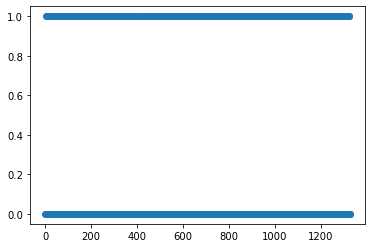

In [15]:
kurals_list = [word_tokenize(sent.lower()) for sent in sentences]
# print(kurals_list)
test_doc_vector =[model.infer_vector(kural_list) for kural_list in kurals_list]
# print(test_doc_vector[:2])
kmeans = KMeans(n_clusters=2, random_state=0).fit(test_doc_vector)
print(len(kmeans.labels_), kmeans.labels_)
plt.scatter(range(len(kmeans.labels_)), kmeans.labels_)

In [16]:
# !pip install sentence_transformers transformers

## SentenceBERT

**Reference**: https://www.sbert.net/

- We import and use the pre-trained mode
- Here we don't train the model

In [17]:
from sentence_transformers import SentenceTransformer
%time sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Wall time: 21.3 s


In [18]:
%time sentence_embeddings = sbert_model.encode(sentences[:2000])

Wall time: 1min 1s


In [19]:
query = "God is Great"
query_vec = sbert_model.encode([query])[0]

In [20]:
topn = min(5, len(sentences))
n = min(2000, len(sentences))

sim = []
for sent in tqdm(random.sample(sentences, n)):
  sim.append(distance.cosine(query_vec, sbert_model.encode([sent])[0]))
#   print("Sentence = ", sent, "; similarity = ", sim)
ind = np.argpartition(sim, -topn)[-topn:]
print(np.array(sentences)[ind])

100%|██████████████████████████████████████████████████████████████████████████████| 1328/1328 [01:34<00:00, 14.09it/s]

[' A long life to you, O dark evening! You are sightless. Is your help-mate (also) as hard-hearted as mine. '
 ' That black-knowledge which is called fraud, is not in those who desire that greatness which is called rectitude. '
 ' Ministers should at all times avoid acts which, in addition to fame, yield no benefit (for the future). '
 ' The removal of the killing hunger of the poor is the place for one to lay up his wealth. '
 " Severe words and excessive punishments will be a file to waste away a king's power for destroying (his enemies). "]


1328 [4 9 4 ... 7 7 5]


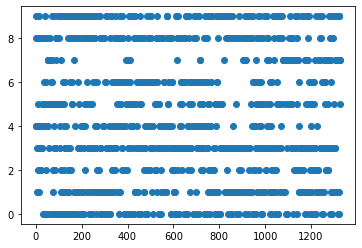

In [21]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(sentence_embeddings)
print(len(kmeans.labels_), kmeans.labels_)
plt.scatter(range(len(kmeans.labels_)), kmeans.labels_)

## InferSent

In [22]:
import os
os.getcwd()

'H:\\jupyter-files'

In [23]:
import os

# encoder_dir = 'H:/sem8/nlp/proof-of-concept/'
# encoder_dir = os.getcwd() + '/'
# base_dir = os.getcwd() + '/'
encoder_dir = base_dir + 'dump/'

os.chdir(encoder_dir)

if(os.path.isdir(encoder_dir + 'encoder')  == False):
    ! mkdir encoder
else:
    print('A subdirectory already exists.')
#     ! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

if(os.path.isdir(encoder_dir + 'Glove')  == False):
    ! mkdir GloVe
else:
    print('A subdirectory already exists.')
#     ! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
#     ! unzip GloVe/glove.840B.300d.zip -d GloVe/

A subdirectory already exists.
A subdirectory already exists.


In [24]:
# !pip install doqu
# ! python --version

In [42]:
from models import InferSent
import torch

V = 2
# base_path = 'H:/sem8/nlp/proof-of-concept/'
base_path = encoder_dir
MODEL_PATH = base_path + 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = base_path + '/fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)

In [43]:
%time model.build_vocab(sentences, tokenize=True)

Found 3528(/3805) words with w2v vectors
Vocab size : 3528
Wall time: 20.1 s


(1, 4096) [[ 0.00746889 -0.09942926  0.04017233 ... -0.04498593 -0.02668202
  -0.02121258]]


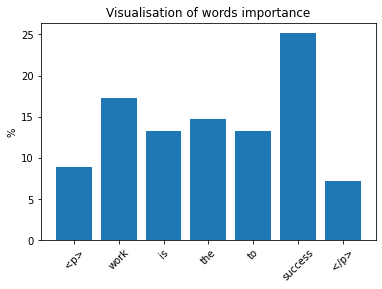

(tensor([[ 0.0075, -0.0994,  0.0402,  ..., -0.0450, -0.0267, -0.0212]],
        grad_fn=<MaxBackward0>),
 array([[0, 1, 1, ..., 1, 3, 5]], dtype=int64))

In [78]:
query = "Hard work is the key to success"
query_vec = model.encode([query])
print(np.array(query_vec).shape, query_vec)
# query_vec = query_vec[0]
model.visualize(query, tokenize=True)

In [79]:
topn = min(len(sentences), 10)
n = min(len(sentences), 2000)

similarity = []
sim = []
sampled_sentences = random.sample(sentences, n)
infernet_sentence_embeddings = [model.encode([sent]) for sent in tqdm(sampled_sentences)]

for sent_emb in tqdm(infernet_sentence_embeddings):
  sim.append(distance.cosine(query_vec, sent_emb))
ind = np.argpartition(sim, -topn)[-topn:]
print(np.array(sentences)[ind])

100%|████████████████████████████████████████████████████████████████████████████| 1328/1328 [00:00<00:00, 7236.74it/s]

[' To see men begging from us in disagreeable, until we see their pleasant countenance. '
 ' Let the pure who know the arrangement of words speak with deliberation after ascertaining (the nature of) the court (then assembled). '
 ' Unclaimed wealth, wealth acquired by taxes, and wealth (got) by conquest of foes are (all) the wealth of the king. '
 ' If I retain in my heart him who has left me without befriending me, I shall lose even the (inward) beauty that remains. '
 ' It is the duty of a king to know quickly (by a spy) what all happens, daily, amongst all men. '
 ' Give to the poor and live with praise. There is no greater profit to man than that. '
 ' He will be surrounded by numerous relatives who manifests generosity and affability. '
 ' Let a man know the measure of his ability (to give), and let him give accordingly; such giving is the way to preserve his property. '
 ' Is there anything so full of knowledge as the face ? (No.) it precedes the mind, whether (the latter is) ple

In [80]:
print(np.array(infernet_sentence_embeddings).shape)
infernet_sentence_embeddings = np.array(infernet_sentence_embeddings).squeeze(1)
print(np.array(infernet_sentence_embeddings).shape)

(1328, 1, 4096)
(1328, 4096)


1328 [4 9 4 ... 7 7 5]


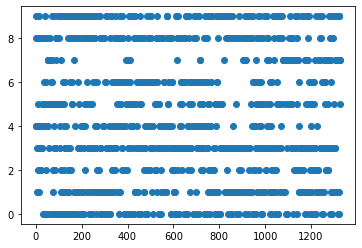

In [81]:
means = KMeans(n_clusters=10, random_state=0).fit(infernet_sentence_embeddings)
print(len(kmeans.labels_), kmeans.labels_)
plt.scatter(range(len(kmeans.labels_)), kmeans.labels_)

In [82]:
# clustering = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=0).fit(infernet_sentence_embeddings)
# # means = KMeans(n_clusters=10, random_state=0).fit(infernet_sentence_embeddings)
# print(len(clustering.labels_), clustering.labels_)
# plt.scatter(range(len(clustering.labels_)), clustering.labels_)

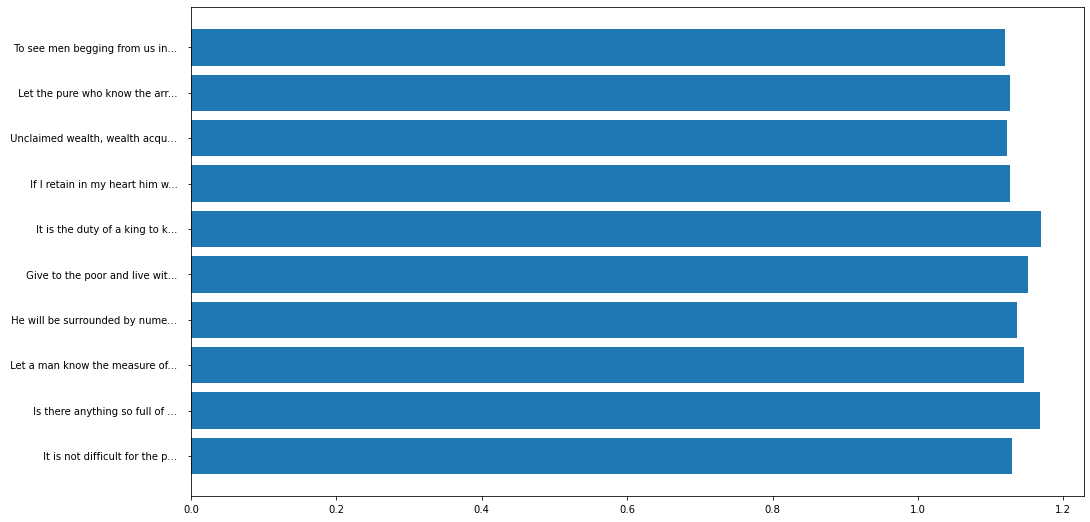

In [83]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.barh([x[:30] + '...' for x in np.array(sentences)[ind]], np.array(sim)[ind])
ax.invert_yaxis()
plt.show()

Reference: [link](https://github.com/gotorehanahmad/Natural-Language-Processing/blob/master/NLI/Infersent.ipynb)

In [ ]:
!pip install bertviz

## Universal Sentence Encoder

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np